In [1]:
from typing import Tuple

import matplotlib.pyplot as plt
import torch

import os

from util import generate_preprocess_transformer, preprocess, undo_preprocessing
from model import ConvAutoencoderDenoiser

In [2]:
def is_image_file(file):
    if not os.path.isfile(file):
        return False
    return os.path.splitext(file)[-1] in (".png", ".jpg", ".jepg")

In [6]:
model_wights: str = "save/full/model_5.pt"
# Size of the final output image (DinA4 with a DPI of 300 is 3508x2480)

target_size: Tuple[int, int] = (3508, 2480)

input_path: str = "../assets/tests/input"
output_path: [str, None] = "../assets/tests/prediction"


input_files: [str, None] = None

if input_files is None:
    input_files = [input_file for input_file in os.listdir(input_path) if is_image_file(input_path+"/"+input_file)]

print(input_files)

['Through+the+Years+p1+Sample+square2.jpg', 'music-sheet-e1325669361502.jpg', 'test_image.png', 'WhiteNoise-02.jpg', '9784025-old-music-note-sheet.jpg', 'Through+the+Years+p1+Sample+square.jpg', 'the-entertainer-beginner-piano-sheet-music-with-colored-notes.jpg', 'bigstock-Music-Sheet-85854419-768x516.jpg.jpg']


In [7]:
model = ConvAutoencoderDenoiser(target_size)

if torch.cuda.is_available():
    print('🚀 Cuda Available. Training on GPU 🤟')
    model.load_state_dict(torch.load(model_wights))
    model = model.cuda()
else:
    print('❌ CUDA not available. Training on CPU 👎')
    model.load_state_dict(torch.load(model_wights, map_location=torch.device('cpu')))
	
transform_dirty = generate_preprocess_transformer((target_size[0] // 2, target_size[1] // 2))
transform_clean = generate_preprocess_transformer(target_size)

❌ CUDA not available. Training on CPU 👎


Through+the+Years+p1+Sample+square2.jpg


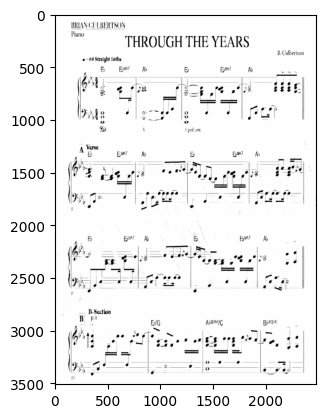

music-sheet-e1325669361502.jpg


In [ ]:
for input_file in input_files:
    
    print(input_file)
    
    
    image = preprocess(input_path, input_file, transform_dirty).unsqueeze(0)
    
    if torch.cuda.is_available():
        image = image.cuda()
        
    prediction = model(image)
    prediction_image = undo_preprocessing(prediction)
    
    if output_path is not None:
        prediction_image.save(output_path + "/" + input_file)
    
    plt.imshow(prediction_image)
    plt.show()